In [ ]:
#Imports
import pandas as pd
import seaborn as sns
import tensorflow as tf
import numpy as np

# Visualizing the Data
---

In [ ]:
df = pd.read_csv('irisdf.csv')

df

sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]

### Pair Plots

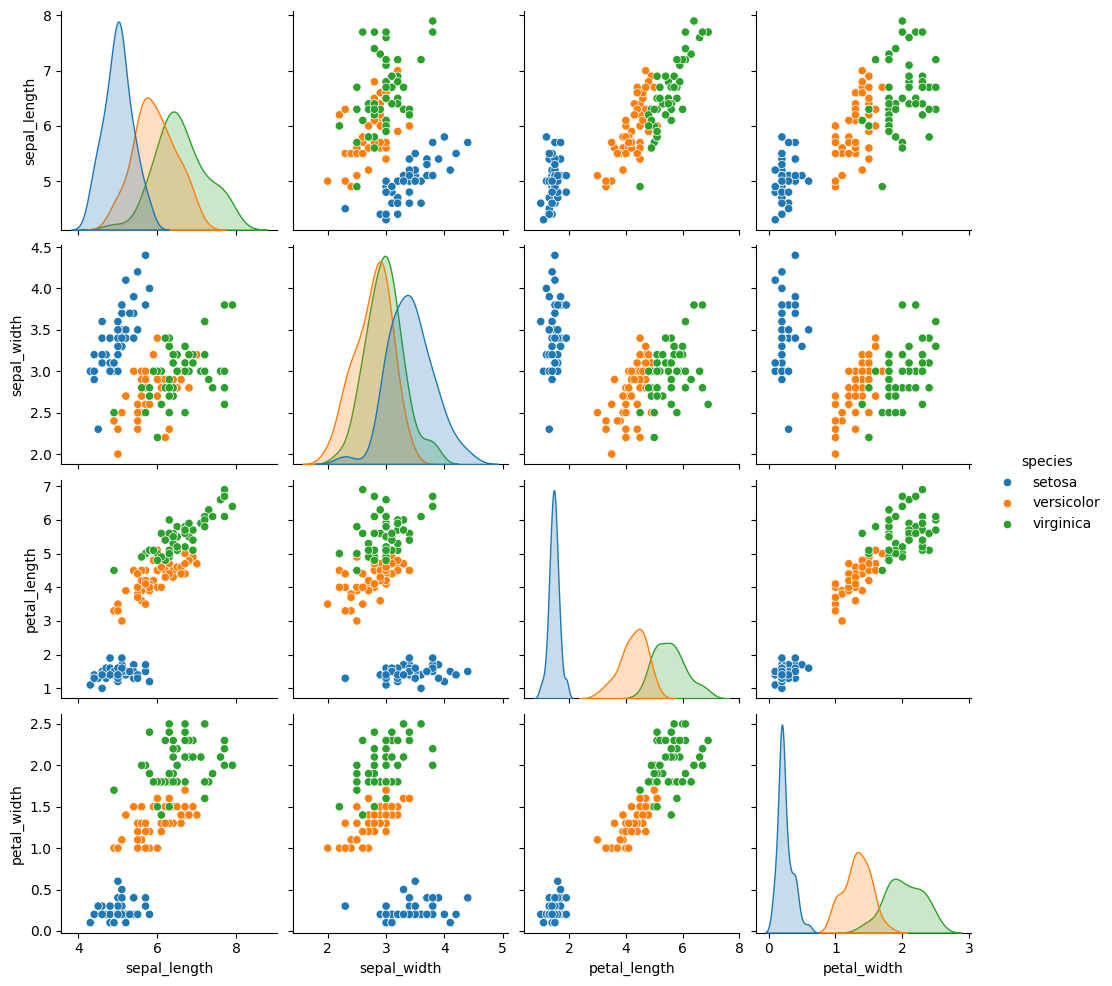

In [34]:
sns.pairplot(df, hue="species")

# Neural Network
---

In [35]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [39]:
# Features and labels
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Encode labels
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
y_categorical = tf.keras.utils.to_categorical(y_encoded, num_classes=3)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_categorical, test_size=0.2, random_state=42)

# Build the neural network model
model = Sequential([
    Dense(8, input_dim=4, activation='relu'),  # Hidden layer with 8 neurons
    Dense(6, activation='relu'),              # Additional hidden layer with 6 neurons
    Dense(3, activation='softmax')            # Output layer with 3 neurons for 3 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Save the model
model.save("iris_neural_network.h5")


Epoch 1/50


c:\Users\Ryan\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.3427 - loss: 1.1456 - val_accuracy: 0.5833 - val_loss: 0.9986
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5196 - loss: 1.0561 - val_accuracy: 0.6250 - val_loss: 0.9812
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3742 - loss: 1.1043 - val_accuracy: 0.6250 - val_loss: 0.9667
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4535 - loss: 1.0298 - val_accuracy: 0.6667 - val_loss: 0.9497
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4558 - loss: 1.0131 - val_accuracy: 0.6667 - val_loss: 0.9331
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4242 - loss: 0.9954 - val_accuracy: 0.6667 - val_loss: 0.9176
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5345 - loss: 0.9533 - val_accuracy: 0.7917 - val_loss: 0.9003
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5451 - loss: 0.9650 - val_accuracy: 0.7917 - val_loss: 0.8841
Ep